<a href="https://colab.research.google.com/github/hasbisdqi/mspd/blob/main/uji_coba_analisis_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path="/content/drive/MyDrive/1 Bahan_KULIAH/MSPD/analisa_data_case/WVS_Cross-National_Wave_7_csv_v6_0.csv"

In [ ]:
# contoh: bandingkan Q46 and Q49 (life satisfaction) by Q260 (sex)
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
#import pingouin as pg   # optional, memudahkan effect size & asumsi
import matplotlib.pyplot as plt

In [ ]:
# 1. load
DF = pd.read_csv(path)   # ganti path sesuai file
# 2. cleaning: set missing codes ke NaN
missing_codes = [-1, -2, -3, -5]
DF.replace(missing_codes, np.nan, inplace=True)

/tmp/ipython-input-3728554994.py:2: DtypeWarning: Columns (346,348,350,580,581,582,583) have mixed types. Specify dtype option on import or set low_memory=False.
  DF = pd.read_csv(path)   # ganti path sesuai file


In [ ]:
print(DF.shape)
DF.head()

(97220, 613)


,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,...,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVoter,v2psbars,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party
0,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070001,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070002,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070003,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070005,...,66.964286,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [ ]:
for i in DF.keys():
  print(i)

version
doi
A_WAVE
A_YEAR
A_STUDY
B_COUNTRY
B_COUNTRY_ALPHA
C_COW_NUM
C_COW_ALPHA
D_INTERVIEW
S007
J_INTDATE
FW_START
FW_END
K_TIME_START
K_TIME_END
K_DURATION
Q_MODE
N_REGION_ISO
N_REGION_WVS
N_REGION_NUTS2
N_REG_NUTS1
N_TOWN
G_TOWNSIZE
G_TOWNSIZE2
H_SETTLEMENT
H_URBRURAL
I_PSU
O1_LONGITUDE
O2_LATITUDE
L_INTERVIEWER_NUMBER
S_INTLANGUAGE
LNGE_ISO
E_RESPINT
F_INTPRIVACY
E1_LITERACY
W_WEIGHT
S018
PWGHT
S025
Q1
Q2
Q3
Q4
Q5
Q6
Q7
Q8
Q9
Q10
Q11
Q12
Q13
Q14
Q15
Q16
Q17
Q18
Q19
Q20
Q21
Q22
Q23
Q24
Q25
Q26
Q27
Q28
Q29
Q30
Q31
Q32
Q33
Q33_3
Q34
Q34_3
Q35
Q35_3
Q36
Q37
Q38
Q39
Q40
Q41
Q42
Q43
Q44
Q45
Q46
Q47
Q48
Q49
Q50
Q51
Q52
Q53
Q54
Q55
Q56
Q57
Q58
Q59
Q60
Q61
Q62
Q63
Q64
Q65
Q66
Q67
Q68
Q69
Q70
Q71
Q72
Q73
Q74
Q75
Q76
Q77
Q78
Q79
Q80
Q81
Q82
Q82_AFRICANUNION
Q82_APEC
Q82_ARABLEAGUE
Q82_ASEAN
Q82_CIS
Q82_CUSMA
Q82_ECO
Q82_EU
Q82_GULFCOOP
Q82_ISLCOOP
Q82_MERCOSUR
Q82_NAFTA
Q82_OAS
Q82_SAARC
Q82_SCO
Q82_TLC
Q82_UNDP
Q83
Q84
Q85
Q86
Q87
Q88
Q89
Q90
Q91
Q92
Q93
Q94
Q94R
Q95
Q95R
Q96
Q96R
Q97
Q97R

## Uji komparasi

In [ ]:
#saya mau melakukan uji komparasi antara cowo & cewe terkait tingkat kebahagiaan
df = DF[['Q46','Q49', 'Q260']].dropna() #melakukan komparasi jawaban no 49 dan 260
df['sex'] = DF['Q260'].map({1:'Male', 2:'Female'}) #antara cowo-cewe

In [ ]:
df.head()

,Q46,Q49,Q260,sex
0,1.0,10.0,2.0,Female
1,1.0,9.0,1.0,Male
2,2.0,9.0,1.0,Male
3,2.0,8.0,2.0,Female
4,2.0,7.0,1.0,Male


In [ ]:
import pandas as pd
import numpy as np

# misal df sudah bersih
# rescale Q46 (1-4) ke skala 1-10
df['Q46_scaled'] = ((df['Q260'] - 1) / 3) * 10


# buat indeks kesejahteraan subjektif
df['wellbeing_index'] = df['Q46_scaled'] + df['Q49']

# deskriptif
df['wellbeing_index'].describe()

,wellbeing_index
count,96075.000000
mean,8.821539
std,2.802713
min,1.000000
25%,7.000000
50%,9.000000
75%,11.333333
max,13.333333


In [ ]:
# 5. cek normalitas per grup (Anderson-Darling)
for g,sub in df.groupby('sex'):
    stat, crit_vals, sig_level = stats.anderson(sub['wellbeing_index'], dist='norm')
    print(f"{g} Anderson-Darling: stat={stat:.3f}")
    print(f"  Critical values: {crit_vals}")
    print(f"  Significance levels: {sig_level}")

Female Anderson-Darling: stat=950.843
  Critical values: [0.576 0.656 0.787 0.918 1.092]
  Significance levels: [15.  10.   5.   2.5  1. ]
Male Anderson-Darling: stat=830.870
  Critical values: [0.576 0.656 0.787 0.918 1.092]
  Significance levels: [15.  10.   5.   2.5  1. ]


In [ ]:
#kelompokkan data
wb_cowo=df[df['sex']=='Male']['wellbeing_index'] #ini khusus cowok
wb_cewe=df[df['sex']=='Female']['wellbeing_index'] #ini khusus cewek

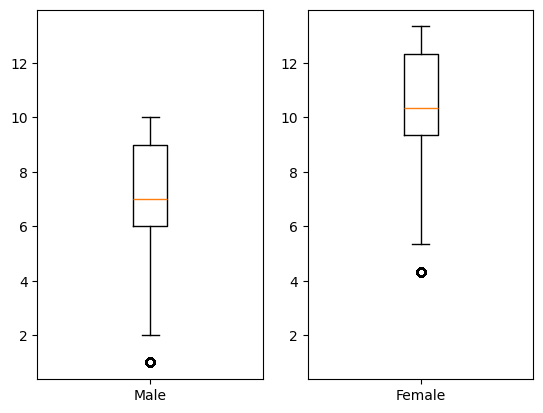

In [ ]:
ax1 = plt.subplot(1,2,1)
ax1.boxplot(wb_cowo)
plt.xticks([1], ['Male'])

ax2 = plt.subplot(1,2,2, sharey=ax1)
ax2.boxplot(wb_cewe)
plt.xticks([1], ['Female'])
plt.show()

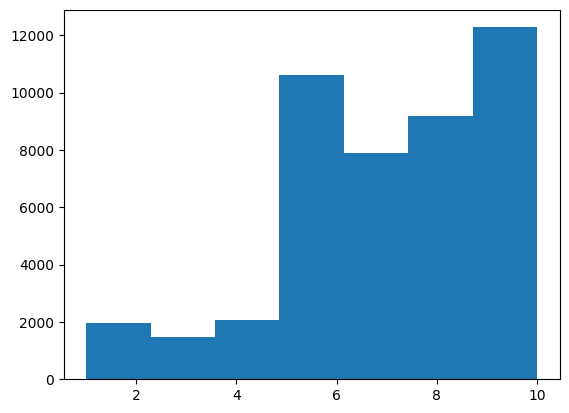

In [ ]:
plt.hist(wb_cowo,bins=7)
plt.show()

In [ ]:
#Mendeteksi outliers
# Calculate IQR (inter-quartile range) for males
iqr_male = wb_cowo.quantile(0.75) - wb_cowo.quantile(0.25)
print(f"IQR for Male: {iqr_male:.3f}")

# Calculate IQR for females
iqr_female = wb_cewe.quantile(0.75) - wb_cewe.quantile(0.25)
print(f"IQR for Female: {iqr_female:.3f}")

IQR for Male: 3.000
IQR for Female: 3.000


In [ ]:
# Define outlier boundaries using the syarat ----> 1.5*IQR rule
lower_bound_male = wb_cowo.quantile(0.25) - 1.5 * iqr_male
upper_bound_male = wb_cowo.quantile(0.75) + 1.5 * iqr_male

lower_bound_female = wb_cewe.quantile(0.25) - 1.5 * iqr_female
upper_bound_female = wb_cewe.quantile(0.75) + 1.5 * iqr_female

# Identify outliers
outliers_male = wb_cowo[(wb_cowo < lower_bound_male) | (wb_cowo > upper_bound_male)]
outliers_female = wb_cewe[(wb_cewe < lower_bound_female) | (wb_cewe > upper_bound_female)]

# Print the number of outliers
print(f"Number of outliers for Male: {len(outliers_male)}")
print(f"Number of outliers for Female: {len(outliers_female)}")

Number of outliers for Male: 1271
Number of outliers for Female: 1343


In [ ]:
# Remove outliers from the male and female dataframes
wb_cowo_no_outliers = wb_cowo[(wb_cowo >= lower_bound_male) & (wb_cowo <= upper_bound_male)].dropna(axis=0)
wb_cewe_no_outliers = wb_cewe[(wb_cewe >= lower_bound_female) & (wb_cewe <= upper_bound_female)].dropna(axis=0)

print(f"Number of observations for Male after removing outliers: {len(wb_cowo_no_outliers)}")
print(f"Number of observations for Female after removing outliers: {len(wb_cewe_no_outliers)}")

Number of observations for Male after removing outliers: 44262
Number of observations for Female after removing outliers: 49199


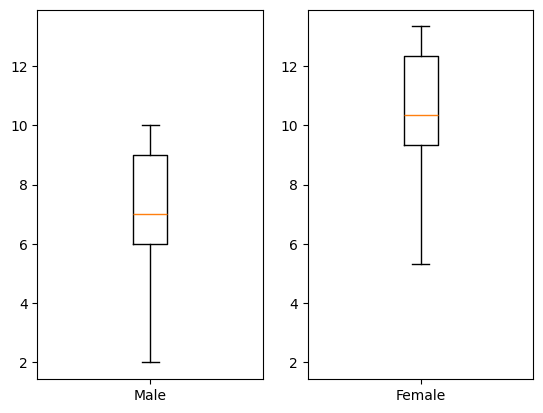

In [ ]:
ax1 = plt.subplot(1,2,1)
ax1.boxplot(wb_cowo_no_outliers)
plt.xticks([1], ['Male'])

ax2 = plt.subplot(1,2,2, sharey=ax1)
ax2.boxplot(wb_cewe_no_outliers)
plt.xticks([1], ['Female'])
plt.show()

In [ ]:
#Uji asumsi klasik
# 6. Levene test (uji homogenitas)
wstat, wp = stats.levene(
    wb_cowo_no_outliers,
    wb_cewe_no_outliers)
print("Levene:", wstat, wp)
print('varians tidak homogen')

Levene: 3.550819336625516 0.05951915602035262
varians tidak homogen


In [ ]:
from scipy import stats

# Perform kstest for wb_cowo_no_outliers
kstest_cowo = stats.kstest(wb_cowo_no_outliers, 'norm')
print(f"Kolmogorov-Smirnov test for Male (no outliers): statistic={kstest_cowo.statistic:.3f}, pvalue={kstest_cowo.pvalue:.3f}")

# Perform kstest for wb_cewe_no_outliers
kstest_cewe = stats.kstest(wb_cewe_no_outliers, 'norm')
print(f"Kolmogorov-Smirnov test for Female (no outliers): statistic={kstest_cewe.statistic:.3f}, pvalue={kstest_cewe.pvalue:.3f}")

Kolmogorov-Smirnov test for Male (no outliers): statistic=0.983, pvalue=0.000
Kolmogorov-Smirnov test for Female (no outliers): statistic=1.000, pvalue=0.000


In [ ]:
# 5. cek normalitas per grup (Anderson-Darling)
for g,sub in [['male',wb_cowo_no_outliers],['female',wb_cewe_no_outliers]]:
    stat, crit_vals, sig_level = stats.anderson(sub, dist='norm')
    print(f"{g} Anderson-Darling: stat={stat:.3f}")
    print(f"  Critical values: {crit_vals}")
    print(f"  Significance levels: {sig_level}")

male Anderson-Darling: stat=771.079
  Critical values: [0.576 0.656 0.787 0.918 1.092]
  Significance levels: [15.  10.   5.   2.5  1. ]
female Anderson-Darling: stat=897.227
  Critical values: [0.576 0.656 0.787 0.918 1.092]
  Significance levels: [15.  10.   5.   2.5  1. ]


In [ ]:
from scipy.stats import mannwhitneyu

#karena gak normal pakai uji non-parametrik --> uji MannWhitneyU
mannwhitneyu_result = mannwhitneyu(wb_cowo_no_outliers, wb_cewe_no_outliers, alternative='two-sided')

print(f"Mann-Whitney U test (no outliers): statistic={mannwhitneyu_result.statistic:.3f}, pvalue={mannwhitneyu_result.pvalue:.3f}")

if mannwhitneyu_result.pvalue < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")

Mann-Whitney U test (no outliers): statistic=238684326.000, pvalue=0.000
Reject the null hypothesis. There is a significant difference between the groups.


## Analisa Korelasi (analisa hubungan)

Bagian ini adalah tugas rekan-rekan semua, individual